# Problem Statement


Create a classification model to predict whether a person makes over $50k a
year

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Dataset

In [4]:
df = pd.read_csv('adult.csv',header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Renaming Columns

In [5]:
df.columns=['Age','Workclass','Fnlwgt','Education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df.head()

,Age,Workclass,Fnlwgt,Education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

# Checking For Null Values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# Handling Datatypes

In [9]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [11]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [12]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [14]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [15]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

# Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
print(cat_cols)

['Workclass', 'Education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [19]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [20]:
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [21]:
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1298
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [22]:
df['Education'].value_counts()

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [23]:
df['marital_status'].value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_status, dtype: int64

In [24]:
df['occupation'].value_counts()

10    4140
3     4099
4     4066
1     3770
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: occupation, dtype: int64

In [25]:
df['relationship'].value_counts()

0    13193
1     8305
3     5068
4     3446
5     1568
2      981
Name: relationship, dtype: int64

In [26]:
df['race'].value_counts()

4    27816
2     3124
1     1039
0      311
3      271
Name: race, dtype: int64

In [27]:
df['native_country'].value_counts()

39    29170
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: native_country, dtype: int64

In [28]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

# Removing Unwanted Columns

In [29]:
df.drop(['marital_status'],axis = 1,inplace = True)

In [30]:
df.drop(['sex'],axis = 1,inplace = True)

In [31]:
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'education_num',
       'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

# Saperating Input Feature Vector as x and output label feature vector as y

In [32]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(32561, 12)
(32561,)


# Splitting Data into Training and Testing Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24420, 12)
(8141, 12)
(24420,)
(8141,)


# Applying Machine Learning Models


# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
#model
decision_tree_model =DecisionTreeClassifier(criterion='gini',max_depth=5)
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
DecisionTreeClassifier(max_depth=5)

DecisionTreeClassifier(max_depth=5)

In [38]:
# Accuracy
print('Training Score',decision_tree_model.score(x_train,y_train))
print('Testing Score',decision_tree_model.score(x_test,y_test))

Training Score 0.8541769041769042
Testing Score 0.847561724603857


# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
#model
random_forest_model =RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5)
random_forest_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=70)

In [41]:
# Accuracy
print('Training Score',random_forest_model.score(x_train,y_train))
print('Testing Score',random_forest_model.score(x_test,y_test))


Training Score 0.8532760032760033
Testing Score 0.8473160545387545


# Logistic Regression Classifier

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
#Model
logistic_regression_model = LogisticRegression(max_iter=500)
logistic_regression_model.fit(x_train,y_train)


LogisticRegression(max_iter=500)

In [44]:
LogisticRegression(max_iter=500)

LogisticRegression(max_iter=500)

In [45]:
# Accuracy
print('Training Score',logistic_regression_model.score(x_train,y_train))
print('Testing Score',logistic_regression_model.score(x_test,y_test))

Training Score 0.788083538083538
Testing Score 0.786512713425869


# K-Nearest Neighbor Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#model
knn_classifier_model = KNeighborsClassifier(n_neighbors=5)
knn_classifier_model.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
# Accuracy
print('Training Score',knn_classifier_model.score(x_train,y_train))
print('Testing Score',knn_classifier_model.score(x_test,y_test))


Training Score 0.8345208845208846
Testing Score 0.7682102935757278


# Creating Function to calculate confusion matrix and classification report for each model

In [52]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [53]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print('Classficaition Report\n',classification_report(y_test,ypred))

# Decision Tree Classifier

In [54]:
gen_metrics(decision_tree_model,x_train,x_test,y_train,y_test)

Training score 0.8541769041769042
Testing score 0.8474388895713058
Confusion Matrix
 [[5843  315]
 [ 927 1056]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6158
           1       0.77      0.53      0.63      1983

    accuracy                           0.85      8141
   macro avg       0.82      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



# Random Forest Classifier

In [55]:
gen_metrics(random_forest_model,x_train,x_test,y_train,y_test)

Training score 0.8528665028665029
Testing score 0.8480530647340622
Confusion Matrix
 [[5943  215]
 [1022  961]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      6158
           1       0.82      0.48      0.61      1983

    accuracy                           0.85      8141
   macro avg       0.84      0.72      0.76      8141
weighted avg       0.84      0.85      0.83      8141



# Logistic Regression

In [56]:
gen_metrics(logistic_regression_model,x_train,x_test,y_train,y_test)

Training score 0.788083538083538
Testing score 0.786512713425869
Confusion Matrix
 [[5838  320]
 [1418  565]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      6158
           1       0.64      0.28      0.39      1983

    accuracy                           0.79      8141
   macro avg       0.72      0.62      0.63      8141
weighted avg       0.76      0.79      0.75      8141



# K-Nearest Neighbour Classifier

In [57]:
gen_metrics(knn_classifier_model,x_train,x_test,y_train,y_test)

Training score 0.8345208845208846
Testing score 0.7682102935757278
Confusion Matrix
 [[5654  504]
 [1383  600]]
Classficaition Report
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      6158
           1       0.54      0.30      0.39      1983

    accuracy                           0.77      8141
   macro avg       0.67      0.61      0.62      8141
weighted avg       0.74      0.77      0.74      8141



# percentage of misclassification in each of these models.

In [63]:
xlabels=['DT','Random Forest','KNN','Logistic']
ylabels=[(1-decision_tree_model.score(x_test,y_test))*100,(1-random_forest_model.score(x_test,y_test))*100,(1-knn_classifier_model.score(x_test,y_test))*100,(1-logistic_regression_model.score(x_test,y_test))*100]

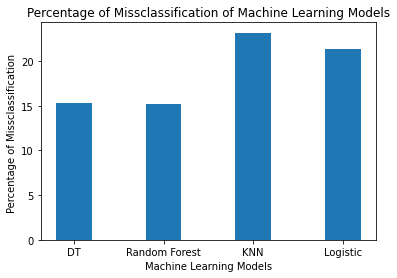

In [64]:
# Simple Bar Plot
plt.bar(xlabels,ylabels,width=0.4)
plt.xlabel('Machine Learning Models')
plt.ylabel("Percentage of Missclassification ")
plt.title('Percentage of Missclassification of Machine Learning Models')
plt.show()


# Report the model with the best accuracy.

In [65]:
xlabels=['DT','Random Forest','KNN','Logistic']
ylabels=[decision_tree_model.score(x_test,y_test),random_forest_model.score(x_test,y_test),knn_classifier_model.score(x_test,y_test),logistic_regression_model.score(x_test,y_test)]

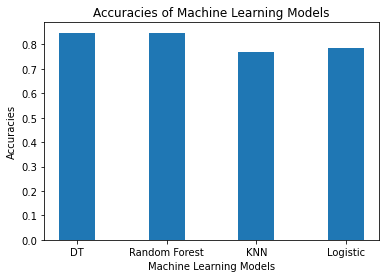

In [66]:
# Simple Bar Plot
plt.bar(xlabels,ylabels,width=0.4)
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracies")
plt.title('Accuracies of Machine Learning Models')
plt.show()


Random Forest Gives Better Accuracy than Decision Tree Classifier, KNN Algorithm and Logistic
Regresssion.

# Model with best Accuracy : Random Forest